<a href="https://colab.research.google.com/github/Tong-Zhong/Sentiment_Analysis_with_spacy/blob/main/2021_JPM_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

掛接雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#前置作業

In [ ]:
#設定--不顯示python輸出的警告
import warnings #有關python輸出的警告
warnings.filterwarnings("ignore") #不顯示python輸出的警告
#warnings.filterwarnings("always") #顯示python輸出的警告

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-12-30 18:34:28--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.96.101, 108.177.96.100, 108.177.96.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.96.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qotk54ojl249lotar4ommp187q6ij12t/1672425225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=76ae6a47-c027-4516-8b1b-0e50458926a7 [following]
--2022-12-30 18:34:32--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qotk54ojl249lotar4ommp187q6ij12t/1672425225000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=76ae6a47-c027-4516-8b1b-0e50458926a7
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connecting to doc-0

In [ ]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#匯入套件
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

#斷詞、斷句分析

##斷詞

In [ ]:
with open('/content/drive/MyDrive/大數據專題/畢專/JPM_2021_Q4_20220114發布.txt') as f :
  text = f.readlines()
text = ' '.join(text)
# text

In [ ]:
#將資料print出來 (這邊可跑可不跑)
# doc = nlp(text)
# for token in doc:
#   print(f'{token.i}  {token.text}  {token._.polarity}  {token._.subjectivity}  {spacy.explain(token.pos_)}  {spacy.explain(token.dep_)}  {spacy.explain(token.tag_)}  {token.is_alpha}  {token.is_stop}  {token.is_punct}  {token.like_num}')

#token.i index
#token.text 單字
#token._.polarity 極性
#token._.subjectivity 主觀性
#spacy.explain(token.pos_) 詞性
#spacy.explain(token.dep_) 詞在句子中的定位
#token.is_alpha 是否為全字母
#token.is_stop 是否為停用詞
#token.is_punct 是否為標點符號
#token.like_num 是否為數字

In [ ]:
#建成DataFrame
doc = nlp(text)
cols = ("Word", "Polarity", "Subjectivity","Pos_", "Dep_", "Alpha", "Stopword", "Punct", "Num")
rows = []
for token in doc:    
    row = [token.text, token._.polarity, token._.subjectivity, spacy.explain(token.pos_),   spacy.explain(token.dep_) ,token.is_alpha, token.is_stop, token.is_punct, token.like_num]    
    rows.append(row)
df = pd.DataFrame(rows, columns=cols)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
2,&,0.0,0.0,coordinating conjunction,coordinating conjunction,False,False,True,False
3,Co.,0.0,0.0,proper noun,conjunct,False,False,False,False
4,(,0.0,0.0,punctuation,punctuation,False,False,True,False
...,...,...,...,...,...,...,...,...,...
18291,rest,0.0,0.0,noun,direct object,True,False,False,False
18292,of,0.0,0.0,adposition,prepositional modifier,True,True,False,False
18293,your,0.0,0.0,pronoun,possession modifier,True,True,False,False
18294,day,0.0,0.0,noun,object of preposition,True,False,False,False


In [ ]:
#查看資料
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18296 entries, 0 to 18295
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Word          18296 non-null  object 
 1   Polarity      18296 non-null  float64
 2   Subjectivity  18296 non-null  float64
 3   Pos_          18296 non-null  object 
 4   Dep_          18260 non-null  object 
 5   Alpha         18296 non-null  bool   
 6   Stopword      18296 non-null  bool   
 7   Punct         18296 non-null  bool   
 8   Num           18296 non-null  bool   
dtypes: bool(4), float64(2), object(3)
memory usage: 786.3+ KB


In [ ]:
# 將stopword、punct、num=True，以及Alpha=False的字刪除
df.drop(df[(df.Alpha == False)|(df.Stopword == True)|(df.Punct == True)|(df.Num == True)].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
0,JPMorgan,0.0,0.0,proper noun,compound,True,False,False,False
1,Chase,0.0,0.0,proper noun,root,True,False,False,False
5,NYSE,0.0,0.0,proper noun,modifier of nominal,True,False,False,False
11,Earnings,0.0,0.0,proper noun,compound,True,False,False,False
12,Conference,0.0,0.0,proper noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
18284,Thank,0.0,0.0,verb,root,True,False,False,False
18287,joining,0.0,0.0,verb,complement of preposition,True,False,False,False
18289,Enjoy,0.4,0.5,verb,root,True,False,False,False
18291,rest,0.0,0.0,noun,direct object,True,False,False,False


**Pos_被刪除的詞性涵義：**
* proper noun(專有名詞)
* adposition(同位語on, in, for, towards)
* auxiliary(助動詞 is、will do)
* coordinating conjunction(並列連詞for、and)
* numeral(數字)
* pronoun(代詞)
* subordinating conjunction(從屬連詞because、when)

In [ ]:
#將'Pos_'的'proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'刪除
df.drop(df[df['Pos_'].isin(['proper noun','adposition' ,'auxiliary', 'coordinating conjunction', 'numeral', 'pronoun', 'subordinating conjunction'])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
77,morning,0.0,0.0,noun,root,True,False,False,False
79,ladies,0.0,0.0,noun,conjunct,True,False,False,False
81,gentlemen,0.0,0.0,noun,conjunct,True,False,False,False
83,Welcome,0.8,0.9,interjection,root,True,False,False,False
94,Earnings,0.0,0.0,noun,compound,True,False,False,False
...,...,...,...,...,...,...,...,...,...
18284,Thank,0.0,0.0,verb,root,True,False,False,False
18287,joining,0.0,0.0,verb,complement of preposition,True,False,False,False
18289,Enjoy,0.4,0.5,verb,root,True,False,False,False
18291,rest,0.0,0.0,noun,direct object,True,False,False,False


In [ ]:
#將Dep_的'auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
#'open clausal complement','punctuation','modifier of quantifier'刪除
df.drop(df[df['Dep_'].isin(['auxiliary (passive)', 'coordinating conjunction', 'clausal subject', 'complement of preposition', 'compound', 'conjunct', 'nominal subject',
'open clausal complement', 'punctuation','modifier of quantifier', 'object of preposition', 'attribute',  'modifier of nominal', 'prepositional modifier', 'appositional modifier', 
'possession modifier', 'nominal subject (passive)', 'punctuation', 'dative', 'numeric modifier' ])].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
77,morning,0.000000,0.0,noun,root,True,False,False,False
83,Welcome,0.800000,0.9,interjection,root,True,False,False,False
101,recorded,0.000000,0.0,verb,root,True,False,False,False
107,muted,0.000000,0.0,verb,root,True,False,False,False
119,live,0.136364,0.5,adverb,adverbial modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
18272,end,0.000000,0.0,noun,direct object,True,False,False,False
18282,disconnect,0.000000,0.0,verb,root,True,False,False,False
18284,Thank,0.000000,0.0,verb,root,True,False,False,False
18289,Enjoy,0.400000,0.5,verb,root,True,False,False,False


In [ ]:
#將'Pos_'&'Dep_'共同條件的['coordinating conjunction', 'coordinating conjunction'] ,['noun', 'direct object'] ,['verb', 'direct object'] ,['noun','adverbial clause modifier'] 
#['verb', 'adverbial clause modifier'],['verb' ,'clausal complement'] ,['noun' ,'clausal complement'] ,['verb', 'relative clause modifier'] ,['noun', 'noun phrase as adverbial modifier'],
#['verb', 'clausal subject'] ,['interjection', 'interjection'] ,['verb','root'] ,['noun','root'] 刪除
df.drop(df[(df.Pos_ == 'coordinating conjunction') & (df.Dep_ == 'coordinating conjunction') | (df.Pos_ == 'noun') & (df.Dep_ == 'direct object') | 
(df.Pos_ == 'verb') & (df.Dep_ == 'direct object') | (df.Pos_ == 'noun') & (df.Dep_ == 'adverbial clause modifier') |
(df.Pos_ == 'verb') & (df.Dep_ == 'adverbial clause modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal complement') |
(df.Pos_ == 'noun') & (df.Dep_ == 'clausal complement') | (df.Pos_ == 'verb') & (df.Dep_ == 'relative clause modifier')|
(df.Pos_ == 'noun') & (df.Dep_ == 'noun phrase as adverbial modifier') | (df.Pos_ == 'verb') & (df.Dep_ == 'clausal subject')|
(df.Pos_ == 'interjection') & (df.Dep_ == 'interjection') | (df.Pos_ == 'verb') & (df.Dep_ == 'root') | (df.Pos_ == 'noun') & (df.Dep_ == 'root') ].index , inplace=True)
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num
83,Welcome,0.800000,0.900000,interjection,root,True,False,False,False
119,live,0.136364,0.500000,adverb,adverbial modifier,True,False,False,False
125,standby,0.000000,0.000000,adjective,root,True,False,False,False
163,ahead,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False
171,Good,0.700000,0.600000,adjective,adjectival modifier,True,False,False,False
...,...,...,...,...,...,...,...,...,...
18186,simply,0.000000,0.357143,adverb,adverbial modifier,True,False,False,False
18242,hugely,0.400000,0.900000,adverb,adverbial modifier,True,False,False,False
18243,valuable,0.000000,0.000000,adjective,adjectival complement,True,False,False,False
18248,competitive,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False


In [ ]:
#查看'Polarity'描述
df['Polarity'].describe()

count    1374.000000
mean        0.092069
std         0.232275
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
df['Subjectivity'].describe()

count    1374.000000
mean        0.333812
std         0.346191
min         0.000000
25%         0.000000
50%         0.300000
75%         0.540000
max         1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
df['Sentiment'] = df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective',放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
df['Opinion'] = df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
df

,Word,Polarity,Subjectivity,Pos_,Dep_,Alpha,Stopword,Punct,Num,Sentiment,Opinion
83,Welcome,0.800000,0.900000,interjection,root,True,False,False,False,Positive,Subjective
119,live,0.136364,0.500000,adverb,adverbial modifier,True,False,False,False,Positive,Subjective
125,standby,0.000000,0.000000,adjective,root,True,False,False,False,Neutral,Objective
163,ahead,0.000000,0.000000,adverb,adverbial modifier,True,False,False,False,Neutral,Objective
171,Good,0.700000,0.600000,adjective,adjectival modifier,True,False,False,False,Positive,Subjective
...,...,...,...,...,...,...,...,...,...,...,...
18186,simply,0.000000,0.357143,adverb,adverbial modifier,True,False,False,False,Neutral,Subjective
18242,hugely,0.400000,0.900000,adverb,adverbial modifier,True,False,False,False,Positive,Subjective
18243,valuable,0.000000,0.000000,adjective,adjectival complement,True,False,False,False,Neutral,Objective
18248,competitive,0.000000,0.000000,adjective,adjectival modifier,True,False,False,False,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
total_count = df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
total_count

,Sentiment,Opinion,總數
0,Negative,Subjective,145
1,Neutral,Objective,558
2,Neutral,Subjective,223
3,Positive,Subjective,448


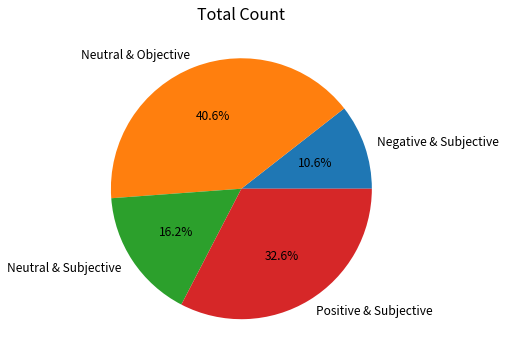

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
size = total_count["總數"].values
label = ["Negative & Subjective", "Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷詞分析由 Neutral & Objective占多數**

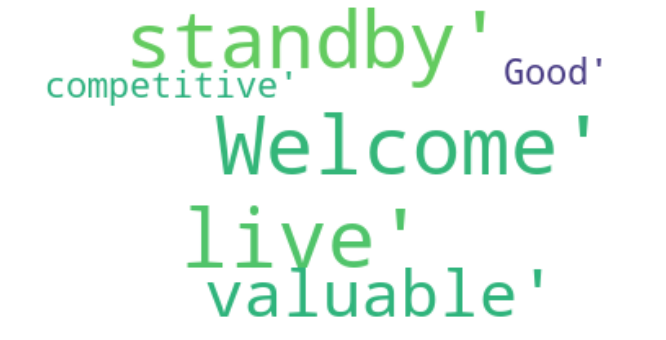

In [ ]:
#文字雲
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
# Create and generate a word cloud image:
kl = df["Word"].values
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(kl))
plt.figure(figsize=(20,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##斷句

In [ ]:
#看polarity、subjectivity、assessments(可跑可不跑)
# ※assessments 後面DataFrame沒有

# _aapl_2021q1_path = '/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt'
# _aapl_2021q1_readfile = open(_aapl_2021q1_path).read()
# text = _aapl_2021q1_readfile
# doc = nlp(text)
# for sentence in doc.sents:
#   sentence_list.append(sentence)
#   print('句子',f'{sentence.text}  {sentence._.polarity}  {sentence._.subjectivity}'
#   ,'\n','依據',sentence._.blob.sentiment_assessments.assessments)

# doc._.polarity                          
# doc._.subjectivity                      
# doc._.blob.sentiment_assessments.assessments   # Assessments:評估polarity、subjectivity 的依據列表 
# doc._.blob.ngrams()  #計算字的出現頻率

In [ ]:
#建成DataFrame
# with open('/content/drive/MyDrive/大數據專題/畢專/aapl_2021_01_27_Q1.txt') as f :
#   text = f.read()
  
doc = nlp(text)

_cols = ("Sentence", "Polarity", "Subjectivity")
_rows = []
for _token in doc.sents:    
    _row = [_token.text, _token._.polarity, _token._.subjectivity] #_token._.blob.sentiment_assessments.assessments 
    _rows.append(_row)
_df = pd.DataFrame(_rows, columns=_cols)
_df

,Sentence,Polarity,Subjectivity
0,JPMorgan Chase & Co. (NYSE:JPM.PK) Q4 2021 Ear...,0.000000,0.000000
1,Barnum - CFOConference Call ParticipantsErika ...,0.400000,0.700000
2,Welcome to JPMorgan Chase’ Fourth Quarter and ...,0.383333,0.483333
3,This call is being recorded.,0.000000,0.000000
4,Your lines will be muted for the duration of t...,0.000000,0.000000
...,...,...,...
853,Good luck to everybody.,0.700000,0.600000
854,OperatorThat marks the end of your call for to...,0.000000,0.000000
855,You may now disconnect.,0.000000,0.000000
856,Thank you for joining.,0.000000,0.000000


In [ ]:
#查看'Polarity'描述
_df['Polarity'].describe()

count    858.000000
mean       0.098746
std        0.209529
min       -0.500000
25%        0.000000
50%        0.000000
75%        0.200000
max        1.000000
Name: Polarity, dtype: float64

In [ ]:
#查看'Subjectivity'描述
_df['Subjectivity'].describe()

count    858.000000
mean       0.329879
std        0.293718
min        0.000000
25%        0.000000
50%        0.323611
75%        0.508155
max        1.000000
Name: Subjectivity, dtype: float64

In [ ]:
#為'Polarity'定義'Positive'、'Neutral'、'Negative'，放在'Sentiment'欄位
def getSentiment(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'
_df['Sentiment'] = _df['Polarity'].apply(getSentiment)

In [ ]:
#為'Subjectivity'定義'Subjective'、'Objective'放在'Opinion'欄位
def getOpinion(_score):
  if _score > 0:
    return 'Subjective'
  elif _score == 0:
    return 'Objective'
_df['Opinion'] = _df['Subjectivity'].apply(getOpinion)

In [ ]:
#查看資料表
_df

,Sentence,Polarity,Subjectivity,Sentiment,Opinion
0,JPMorgan Chase & Co. (NYSE:JPM.PK) Q4 2021 Ear...,0.000000,0.000000,Neutral,Objective
1,Barnum - CFOConference Call ParticipantsErika ...,0.400000,0.700000,Positive,Subjective
2,Welcome to JPMorgan Chase’ Fourth Quarter and ...,0.383333,0.483333,Positive,Subjective
3,This call is being recorded.,0.000000,0.000000,Neutral,Objective
4,Your lines will be muted for the duration of t...,0.000000,0.000000,Neutral,Objective
...,...,...,...,...,...
853,Good luck to everybody.,0.700000,0.600000,Positive,Subjective
854,OperatorThat marks the end of your call for to...,0.000000,0.000000,Neutral,Objective
855,You may now disconnect.,0.000000,0.000000,Neutral,Objective
856,Thank you for joining.,0.000000,0.000000,Neutral,Objective


In [ ]:
#將"Sentiment"與"Opinion"做為一群，看總數
_total_count = _df.groupby(["Sentiment", "Opinion"]).size().reset_index(name="總數")
_total_count

,Sentiment,Opinion,總數
0,Negative,Objective,1
1,Negative,Subjective,126
2,Neutral,Objective,265
3,Neutral,Subjective,71
4,Positive,Objective,1
5,Positive,Subjective,394


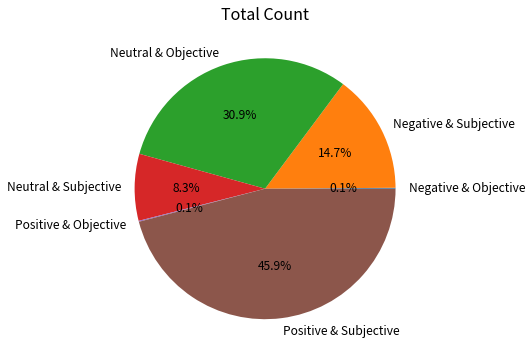

In [ ]:
#將資料畫成圓餅圖查看
import matplotlib.pyplot as plt
_size = _total_count["總數"].values
label = ["Negative & Objective","Negative & Subjective","Neutral & Objective", "Neutral & Subjective","Positive & Objective", "Positive & Subjective"]
plt.figure(figsize=(20,6))
plt.pie(_size,                           # 數值
        labels = label,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False) 
plt.title("Total Count",fontsize = 16)
plt.show()

**AAPL_Q1 斷句分析由 Positive & Subjective占多數**

In [ ]:
#查看'Negative','Subjective'的句子
neg_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Negative') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neg_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neg_sub_j+=1

1)Starting with the fourth quarter on page 1, the Firm reported net income of $10.4 billion, EPS of $3.33 on revenue of $30.3 billion, and delivered an ROTCE of 19%.

2)If you look at things on this basis, the drivers are the same, but the numbers are a little different.

3)NII, excluding Markets, is up 4%; NIR, excluding Markets, is up 3%; and Markets is down 11% on normalization.

4)We delivered a return on tangible common equity of 23% or 18%, excluding the reserve releases.

5)On the balance sheet and capital on page 5, we ended the quarter with a CET1 ratio of 13%, up slightly, and reflecting nearly $5 billion of capital distributions to shareholders, including $1.9 billion of net repurchases.

6)Card outstandings were up 5% year-on-year, but remain down 8% versus 4Q ‘19.

7)In home lending, loans were down 1% year-on-year, but up 1% quarter-on-quarter as prepayments have slowed.

8)In auto, average loans were up 7% year-on-year and up 1% quarter-on-quarter.

9)And we maintained o

In [ ]:
#查看'Neutral','Objective'的句子
neu_ob_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Objective'):
    print(str(neu_ob_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_ob_j+=1

1)JPMorgan Chase & Co. (NYSE:JPM.PK) Q4 2021 Earnings Conference Call January 14, 2022 8:30 AM ETCompany ParticipantsJamie Dimon - Chairman and CEOJeremy

2)This call is being recorded.

3)Your lines will be muted for the duration of the call.

4)Please standby.

5)At this time, I’d like to turn the call over to JPMorgan Chase’s Chairman and CEO, Jamie Dimon; and Chief Financial Officer, Jeremy Barnum.

6)Mr. Barnum, please go ahead.

7)Jeremy BarnumThank you, operator.

8)Adjusting for this, we delivered a 17% ROTCE this quarter.

9)Revenue of $30.3 billion was up 1% year-on-year.

10)We’ll be keeping this format going forward and you’ll see later that this is how we will talk about the outlook.

11)And then, onto reserves on page 4.

12)CCB reported net income of $4.2 billion, including reserves releases of $1.6 billion.

13)Deposits were up 20% year-on-year and 4%, sequentially, and client investment assets were up 22% year-on-year, about evenly split between market performance and 

In [ ]:
#查看'Neutral','Subjective'的句子
neu_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Neutral') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(neu_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    neu_sub_j+=1

1)With that, let’s go to our businesses, starting with consumer and community banking on page 6.

2)Within that, travel and entertainment spend was up 13% versus 4Q ‘19, but we have seen some softening in recent weeks contemporaneously with the Omicron wave.

3)Revenue of $2.6 billion was up 6% year-on-year on record Investment Banking revenue, driven by continued strength in M&A and acquisition related financing.

4)And finally, loans were up 4% quarter-on-quarter with continued strength in custom lending, mortgages and securities-based lending while deposits were up 15% sequentially.

5)We believe it’s critical to identify and resolve customer pain points and improve the user experience.

6)With that, let’s talk about the outlook and the year ahead, starting on page 15.

7)But the headwinds likely exceed the tailwinds as capital markets normalize off an elevated wallet, and we continue to make additional investments as well as the impact of inflationary pressures.

8)Our central case

In [ ]:
#查看'Positive','Subjective'的句子
pos_sub_j=1
sorted = _df.sort_values(by=['Polarity','Subjectivity'],ascending=False)
for i in range(0, sorted.shape[0]):
  if(sorted['Sentiment'][i] == 'Positive') & (sorted['Opinion'][i] == 'Subjective'):
    print(str(pos_sub_j)+ ')' + sorted['Sentence'][i])
    print()
    pos_sub_j+=1

1)Barnum - CFOConference Call ParticipantsErika Najarian - UBSJohn McDonald - Autonomous ResearchGlenn Schorr - Evercore ISIKen Usdin - JefferiesJim Mitchell - Seaport ResearchBetsy Graseck - Morgan StanleySteve Chubak - Wolfe ResearchMatt O’Connor - Deutsche BankEbrahim Poonawala - Bank of AmericaMike Mayo - Wells Fargo SecuritiesGerard Cassidy - RBC Capital MarketsOperatorGood morning, ladies and gentlemen.

2)Welcome to JPMorgan Chase’ Fourth Quarter and Full Year 2021 Earnings Call.

3)We will now go live to the presentation.

4)Good morning, everyone.

5)The presentation is available on our website, and please refer to the disclaimer in the back.

6)It’s slightly longer this quarter to cover both our fourth quarter and full year results, as well as spend some time talking about the outlook for next year.

7)These results included a $1.8 billion net credit reserve release, which I’ll cover in more detail shortly.

8)Touching on a few highlights, as we suggested last quarter, we hav

#結果


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

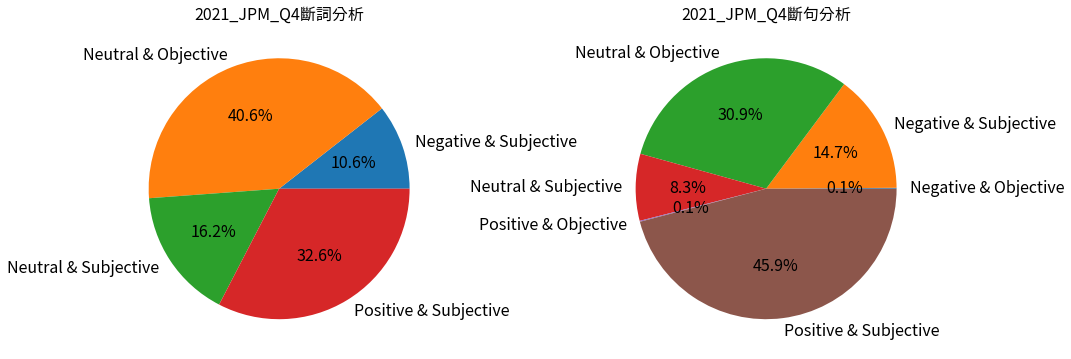

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
size = total_count["總數"].values
_size = _total_count["總數"].values
label1 = ["Negative & Subjective","Neutral & Objective", "Neutral & Subjective","Positive & Subjective"]
label2 = ["Negative & Objective","Negative & Subjective","Neutral & Objective", "Neutral & Subjective","Positive & Objective", "Positive & Subjective"]
axs[0].pie(size, labels=label1, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16} )
axs[0].set_title('2021_JPM_Q4斷詞分析', fontsize=16)


axs[1].pie(_size, labels=label2, autopct='%1.1f%%', pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16})
axs[1].set_title('2021_JPM_Q4斷句分析', fontsize=16)


plt.savefig("2021_JPM_Q4.png")
from google.colab import files
files.download("2021_JPM_Q4.png")

#HTML

In [ ]:
#%%shell
#jupyter nbconvert --to html '剛複製的路徑'

%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.ipynb to html
[NbConvertApp] Writing 619650 bytes to /content/drive/MyDrive/大數據專題/大數據/專題12 26進度.html


5家公司，4季，2年 =5* 4 * 2=40